<a href="https://colab.research.google.com/github/yashfirkedata/NLP-Replicating-PubMed-200k-RCT-Paper/blob/main/NLP_Replicating_PubMed_200k_RCT_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SkimLit 📄🔥**

### Model Input
> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ). Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD )., Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured. There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model Output
> ['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']

Dataset: https://github.com/Franck-Dernoncourt/pubmed-rct

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 9.85 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [2]:
ls

pubmed-rct/  sample_data/


In [3]:
ls pubmed-rct

PubMed_200k_RCT/                                PubMed_20k_RCT_numbers_replaced_with_at_sign/
PubMed_200k_RCT_numbers_replaced_with_at_sign/  README.md
PubMed_20k_RCT/


Each contains a different version of the PubMed 200k RCT dataset.

Looking at the README file from the GitHub page, we get the following information:

- PubMed 20k is a subset of PubMed 200k. I.e., any abstract present in PubMed 20k is also present in PubMed 200k.
- PubMed_200k_RCT is the same as PubMed_200k_RCT_numbers_replaced_with_at_sign, except that in the latter all numbers had been replaced by @. (same for PubMed_20k_RCT vs. PubMed_20k_RCT_numbers_replaced_with_at_sign).

Read README.md for proper info

**Rather than working with the whole 200k dataset, we'll keep our experiments quick by starting with a smaller subset.**

**We will select PubMed_20k_RCT_numbers_replaced_with_at_sign**

In [4]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [5]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [6]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]

In [7]:
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

# **Data Preprocessing**

In [8]:
# Function to read lines of a document

def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.

  Args:
      filename: a string containing the target filepath to read.

  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename,"r") as f:
    return f.readlines()

In [9]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

**Observations:**
- This is basically list of strings containing different abstract samples, along with the sentences and the label to it.
- The label and sentence are seperated by \t
- Each sentence ends with a new line \n
- Different abstracts are seperated by abstract ID (startwith ###) and new lines \n


***Let's write a function to perform the following steps:***
* Take a target file of abstract samples.
* Read the lines in the target file.
* For each line in the target file:  
  * If the line begins with `###` mark it as an abstract ID and the beginning of a new abstract.
    * Keep count of the number of lines in a sample.
  * If the line begins with `\n` mark it as the end of an abstract sample.
    * Keep count of the total lines in a sample.
  * Record the text before the `\t` as the label of the line.
  * Record the text after the `\t` as the text of the line.
* Return all of the lines in the target text file as a list of dictionaries containing the key/value pairs:
  * `"line_number"` - the position of the line in the abstract (e.g. `3`).
  * `"target"` - the role of the line in the abstract (e.g. `OBJECTIVE`).
  * `"text"` - the text of the line in the abstract.
  * `"total_lines"` - the total lines in an abstract sample (e.g. `14`).
* Abstract ID's and newlines should be omitted from the returned preprocessed data.

Example returned preprocessed sample (a single line from an abstract):

```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```

In [10]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename)
  abstract_lines = ""  # A string to accumulate the lines of the current abstract.
  abstract_samples = [] # A list to store the processed line data for all abstracts.

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():  # \n is also considered space so this means if line is new line
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) -1 #as lines starts from 0
        abstract_samples.append(line_data)

    else:
      abstract_lines +=line

  return abstract_samples



In [11]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 761 ms, sys: 121 ms, total: 882 ms
Wall time: 1.87 s


(180040, 30212, 30135)

In [12]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Purrfect

In [13]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(15)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [14]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

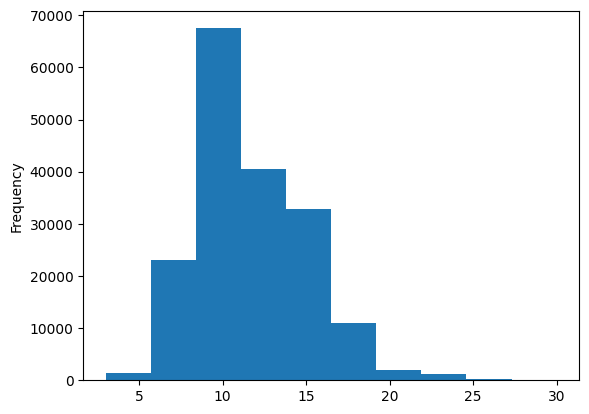

In [15]:
train_df.total_lines.plot.hist()

### Get list of sentences

When we build our deep learning model, one of its main inputs will be a list of strings (the lines of an abstract).

We can get these easily from our DataFrames by calling the tolist() method on our "text" columns.

In [16]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [17]:
train_sentences[:1]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .']

### Make numeric labels (ML models require numeric labels)

We could get away with just making label encoded labels, however, TensorFlow's CategoricalCrossentropy loss function likes to have one hot encoded labels (this will enable us to use label smoothing later on).

In [18]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))
# we had to reshape cuz OHE needs 2D array
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [19]:
# Label encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [20]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

In [21]:
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# **Modelling 🔥🔥🔥🔥**

We'll start by creating a simple baseline model to obtain a score we'll try to beat by building more and more complex models as we move towards replicating the sequence model outlined in Neural networks for joint sentence classification in medical paper abstracts.

## **Model 0:** Baseline ML Model

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X=train_sentences, y = train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [23]:
model_0.score(X = val_sentences, y  = val_labels_encoded)

0.7218323844829869

In [24]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

#####Getting helper funtions

In [25]:
!wget https://raw.githubusercontent.com/yashfirkedata/NLP-Replicating-PubMed-200k-RCT-Paper/main/helper_functions.py

--2024-07-10 11:17:57--  https://raw.githubusercontent.com/yashfirkedata/NLP-Replicating-PubMed-200k-RCT-Paper/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10127 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.89K  --.-KB/s    in 0s      

2024-07-10 11:17:58 (102 MB/s) - ‘helper_functions.py’ saved [10127/10127]



In [26]:
# Import calculate_results helper function
from helper_functions import calculate_results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

Lets keep in mind

**Baseline Accuracy: 72.18**

## Data Preprocessing for Deep Learning Models

We need to create vectorization and embeddings and create data using tf.data API for faster processing

In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers

We need to pad all sentences to one length in order to send to modelling

In [28]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([1.5999e+05, 1.8760e+04, 1.1510e+03, 9.9000e+01, 2.8000e+01,
        1.0000e+01, 2.0000e+00]),
 array([  1.        ,  43.14285714,  85.28571429, 127.42857143,
        169.57142857, 211.71428571, 253.85714286, 296.        ]),
 <BarContainer object of 7 artists>)

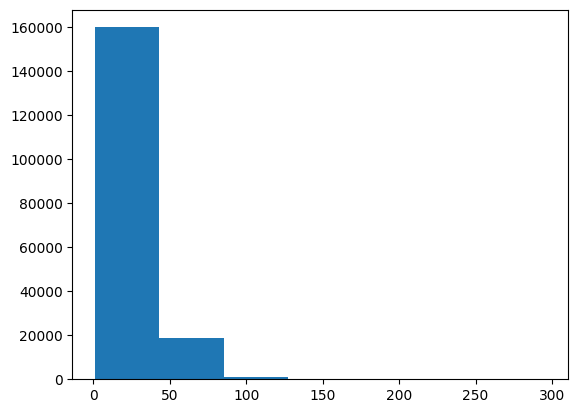

In [29]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins = 7)

Looks like majority sentences are between 0 and 50 in length.

We can check the 95th percentile of sentence lengths.

In [30]:
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

Looks like 55 is the required number of words in sentence so we will pad the sentences less than 55 words with 0 and sentences more than 55 in length will get truncated.

In [31]:
max(sent_lens)

296

### Create text vectorizer

Section 3.2 of the PubMed 200k RCT paper states the vocabulary size of the PubMed 20k dataset as 68,000. So we'll use that as our max_tokens parameter.

In [32]:
max_tokens = 68000

And since discovered a sentence length of 55 covers 95% of the training sentences, we'll use that as our output_sequence_length parameter.

In [33]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens,
                                    output_sequence_length = 55)

In [34]:
text_vectorizer.adapt(train_sentences)

In [35]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text: {target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer(target_sentence)}")

Text: the study shows equivalence between cancellous allograft mixed with bone marrow concentrate and autologous iliac crest bone for lumbar fusions .

Length of text: 21

Vectorized text: [    2    17  1809  4160    30 23678  4673   832     7   410  3691  6548
     3  2598  7858  5580   410    11  1244 23082     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


Exploring our text

In [36]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [37]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Create custom text embedding

In [38]:
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab),
                               output_dim = 128,
                               mask_zero = True,
                               name = "token_embedding")

In [39]:
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
the study shows equivalence between cancellous allograft mixed with bone marrow concentrate and autologous iliac crest bone for lumbar fusions .

Sentence after vectorization (before embedding):
[[    2    17  1809  4160    30 23678  4673   832     7   410  3691  6548
      3  2598  7858  5580   410    11  1244 23082     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.04465653  0.00162073  0.03708991 ... -0.00354563  0.04975506
    0.02103952]
  [-0.03735403 -0.03648944 -0.02207551 ...  0.01414622  0.01243488
    0.02486589]
  [-0.04112505  0.04995606  0.02748344 ... -0.03167204  0.00714245
   -0.04454461]
  ...
  [ 0.03791757  0.02156827 -0.01025192 ...  0.00494721 -0.04407209
   -0.03525205]
  [ 0.03791757  0.02156827 -0.01025192 ...  0.00494721 -0.04407209


### Create datasets (as fast as possible)

> The tf.data API provides methods which enable faster data loading.

The main steps we'll want to use with our data is to turn it into a PrefetchDataset of batches.

To create a batched PrefetchDataset we can use the methods `batch()` and `prefetch()`, the parameter `tf.data.AUTOTUNE` will also allow TensorFlow to determine the optimal amount of compute to use to prepare datasets.

In [40]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [41]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## **Model 1:** Conv1D with token embeddings

In [42]:
inputs = layers.Input(shape = (1,) , dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(token_embeddings)
x  = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes,  activation = "softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [43]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [49]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              epochs = 3,
                              validation_data = valid_dataset,
                              validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 21s 31ms/step - loss: 0.9150 - accuracy: 0.6404 - val_loss: 0.6811 - val_accuracy: 0.7417
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 0.6561 - accuracy: 0.7564 - val_loss: 0.6280 - val_accuracy: 0.7733
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6180 - accuracy: 0.7719 - val_loss: 0.5974 - val_accuracy: 0.7862


Steps per Epoch
Definition: The number of batches processed before completing one epoch.

Purpose: Allows training on a subset of data per epoch for faster feedback and resource efficiency.

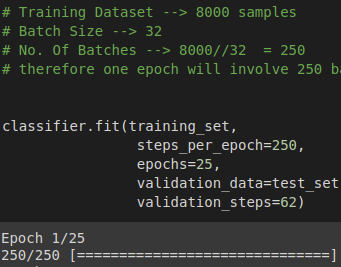



In [50]:
# Continue training for 10 more epochs
model_1_history_continued = model_1.fit(train_dataset,
                                        steps_per_epoch = int(0.1 * len(train_dataset)),
                                        epochs = 7,
                                        initial_epoch = model_1_history.epoch[-1] + 1,
                                        validation_data = valid_dataset,
                                        validation_steps = int(0.1 * len(valid_dataset)))


Epoch 4/7
562/562 [==============================] - 6s 10ms/step - loss: 0.5208 - accuracy: 0.8163 - val_loss: 0.5884 - val_accuracy: 0.7912
Epoch 5/7
562/562 [==============================] - 3s 6ms/step - loss: 0.4578 - accuracy: 0.8381 - val_loss: 0.5946 - val_accuracy: 0.7862
Epoch 6/7
562/562 [==============================] - 4s 7ms/step - loss: 0.4453 - accuracy: 0.8425 - val_loss: 0.6025 - val_accuracy: 0.7799
Epoch 7/7
562/562 [==============================] - 5s 9ms/step - loss: 0.5875 - accuracy: 0.7899 - val_loss: 0.5710 - val_accuracy: 0.7919


Cant se much improvements so we stop here.


In [51]:
# Evaluate on whole validation dataset (we only validated on 10% of batches during training)
model_1.evaluate(valid_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.5707 - accuracy: 0.7945


[0.570658802986145, 0.7944856286048889]

In [52]:
# Make predictions (our model outputs prediction probabilities for each class)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 5s 5ms/step


array([[6.07559383e-01, 1.21637031e-01, 1.13097906e-01, 7.65788481e-02,
        8.11268166e-02],
       [5.20032048e-01, 2.37051368e-01, 4.94766124e-02, 1.64014712e-01,
        2.94253305e-02],
       [2.74426907e-01, 2.30945926e-03, 1.11390208e-03, 7.22125709e-01,
        2.39240544e-05],
       ...,
       [8.94436562e-06, 2.17478737e-04, 7.53635133e-04, 4.51302867e-06,
        9.99015450e-01],
       [1.40484229e-01, 3.77743810e-01, 1.03808910e-01, 5.19863032e-02,
        3.25976759e-01],
       [6.60314634e-02, 9.04013813e-01, 1.60543043e-02, 1.91260304e-03,
        1.19878575e-02]], dtype=float32)

In [53]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [54]:
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 79.44856348470807,
 'precision': 0.7966563493685201,
 'recall': 0.7944856348470807,
 'f1': 0.7904432485208672}

## **Model 2:** Feature Extraction with Pretrained token embeddings

In [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), it mentions they used a [pretrained GloVe embedding](https://nlp.stanford.edu/projects/glove/) as a way to initialise their token embeddings.

In [55]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [56]:
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
future work should evaluate the impact of intraoperative hand hygiene improvement strategies on the dynamics of intraoperative enterococcus transmission .

Sentence after embedding:
[ 0.0149464  -0.0005981  -0.03527207 -0.06827629 -0.06994679 -0.05148161
  0.01871859  0.04553523 -0.06641234  0.05295487 -0.02737884  0.02901806
 -0.01980992 -0.02061947  0.06141489 -0.0360725   0.03337567 -0.07459698
 -0.00694409 -0.05353986  0.06023516  0.02496298 -0.04684056 -0.01798499
 -0.00127451  0.02644223  0.03687532  0.04279182 -0.06853574 -0.06432986] (truncated output)...

Length of sentence embedding:
512


In [60]:
# Modelling
inputs = layers.Input(shape= [], dtype = tf.string)
pretrained_embeddings = tf_hub_embedding_layer(inputs)
x = layers.Dense(128,activation = "relu")(pretrained_embeddings)
outputs = layers.Dense(5,activation = "softmax")(x)
model_2 = tf.keras.Model(inputs = inputs,
                         outputs = outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [61]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [66]:
model_2_history = model_2.fit(train_dataset,
            steps_per_epoch = int(0.1 * len(train_dataset)),
            epochs = 7,
            validation_data = valid_dataset,
            validation_steps = int(0.1 * len(valid_dataset))
            )

Epoch 1/7
562/562 [==============================] - 9s 16ms/step - loss: 0.6076 - accuracy: 0.7714 - val_loss: 0.6173 - val_accuracy: 0.7646
Epoch 2/7
562/562 [==============================] - 12s 21ms/step - loss: 0.5911 - accuracy: 0.7780 - val_loss: 0.6203 - val_accuracy: 0.7613
Epoch 3/7
562/562 [==============================] - 11s 20ms/step - loss: 0.5943 - accuracy: 0.7743 - val_loss: 0.6262 - val_accuracy: 0.7570
Epoch 4/7
562/562 [==============================] - 7s 12ms/step - loss: 0.6012 - accuracy: 0.7737 - val_loss: 0.6151 - val_accuracy: 0.7640
Epoch 5/7
562/562 [==============================] - 8s 15ms/step - loss: 0.6203 - accuracy: 0.7646 - val_loss: 0.6096 - val_accuracy: 0.7633
Epoch 6/7
562/562 [==============================] - 7s 13ms/step - loss: 0.6245 - accuracy: 0.7637 - val_loss: 0.6078 - val_accuracy: 0.7656
Epoch 7/7
562/562 [==============================] - 8s 13ms/step - loss: 0.6015 - accuracy: 0.7723 - val_loss: 0.6066 - val_accuracy: 0.7670


In [67]:
history_2_continued = model_2.fit(train_dataset,
            steps_per_epoch = int(0.1 * len(train_dataset)),
            epochs = 10,
            initial_epoch = model_2_history.epoch[-1] + 1,
            validation_data = valid_dataset,
            validation_steps = int(0.1 * len(valid_dataset))
            )

Epoch 8/10
562/562 [==============================] - 9s 16ms/step - loss: 0.5883 - accuracy: 0.7782 - val_loss: 0.6028 - val_accuracy: 0.7723
Epoch 9/10
562/562 [==============================] - 7s 13ms/step - loss: 0.5728 - accuracy: 0.7870 - val_loss: 0.6076 - val_accuracy: 0.7666
Epoch 10/10
562/562 [==============================] - 8s 14ms/step - loss: 0.5758 - accuracy: 0.7802 - val_loss: 0.6140 - val_accuracy: 0.7653


In [68]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 17s 18ms/step - loss: 0.6227 - accuracy: 0.7612


[0.6226823329925537, 0.7611545324325562]

In [69]:
# Make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 23s 10ms/step


array([[5.7864690e-01, 1.8938747e-01, 9.8235054e-05, 2.3108335e-01,
        7.8403181e-04],
       [3.5938913e-01, 4.7580215e-01, 2.0495860e-03, 1.6211496e-01,
        6.4408418e-04],
       [4.2826071e-01, 2.4802154e-02, 7.4409996e-03, 5.3398377e-01,
        5.5123954e-03],
       ...,
       [1.6020517e-03, 3.2705048e-04, 2.2971215e-02, 2.2936966e-04,
        9.7487032e-01],
       [1.5657466e-02, 1.8229704e-01, 1.4543955e-01, 2.6658736e-03,
        6.5394002e-01],
       [1.6809002e-02, 9.7853094e-01, 3.5691762e-03, 1.3773609e-04,
        9.5315091e-04]], dtype=float32)

In [70]:
# Convert the predictions with feature extraction model to classes
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [71]:
# Calculate results from TF Hub pretrained embeddings results on validation set
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.115450814246,
 'precision': 0.7596885068017456,
 'recall': 0.76115450814246,
 'f1': 0.7590583882549476}

## **Model 3**: Conv1D with character embeddings
The [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) paper mentions their model uses a hybrid of token and character embeddings.

In [73]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_training_sentence)

'f u t u r e   w o r k   s h o u l d   e v a l u a t e   t h e   i m p a c t   o f   i n t r a o p e r a t i v e   h a n d   h y g i e n e   i m p r o v e m e n t   s t r a t e g i e s   o n   t h e   d y n a m i c s   o f   i n t r a o p e r a t i v e   e n t e r o c o c c u s   t r a n s m i s s i o n   .'

In [74]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chats = [split_chars(sentence) for sentence in test_sentences]

In [76]:
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [78]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

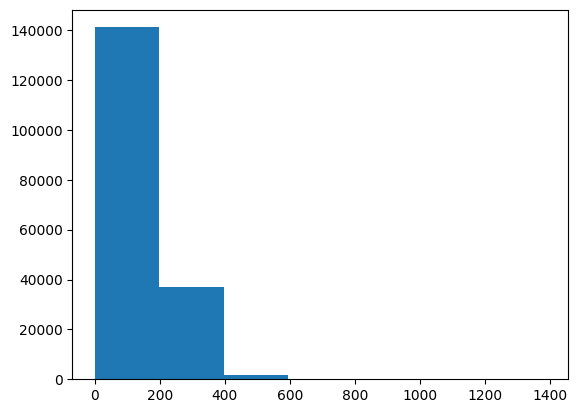

In [81]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins = 7)

Okay, looks like most of our sequences are between 0 and 200 characters long.

In [83]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

We'll set `max_tokens` (the total number of different characters in our sequences) to 28, in other words, 26 letters of the alphabet + space + OOV (out of vocabulary or unknown) tokens.

In [84]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
NUM_CHAR_TOKENS = len(alphabet) +2 # num characters in alphabet + space + OOV token

In [87]:
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    standardize = "lower_and_strip_punctuation",
                                    name = "char_vectorizer")

char_vectorizer.adapt(train_chars)

In [88]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [89]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
a n   i n t e r v e r t e b r a l   d i s c   v o l u m e t r i c   a n a l y s i s   (   i d v a   )   ,   d w i   s i g n a l   s c o r e   a n d   p o s t   t r e a t m e n t   c l i n i c a l   o u t c o m e   e v a l u a t i o n   w e r e   p e r f o r m e d   f o r   a n   a s s e s s m e n t   o f   h e r n i a   r e d u c t i o n   .

Length of chars: 146

Vectorized chars:
[[ 5  6  4  6  3  2  8 21  2  8  3  2 22  8  5 12 10  4  9 11 21  7 12 16
  15  2  3  8  4 11  5  6  5 12 19  9  4  9  4 10 21  5 10 20  4  9  4 18
   6  5 12  9 11  7  8  2  5  6 10 14  7  9  3  3  8  2  5  3 15  2  6  3
  11 12  4  6  4 11  5 12  7 16  3 11  7 15  2  2 21  5 12 16  5  3  4  7
   6 20  2  8  2 14  2  8 17  7  8 15  2 10 17  7  8  5  6  5  9  9  2  9
   9 15  2  6  3  7 17 13  2  8  6  4  5  8  2 10 16 11  3  4  7  6  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0

Due to the standardize parameter of TextVectorization being "lower_and_strip_punctuation" and the split parameter being "whitespace" by default, symbols (such as @) and spaces are removed.

In [91]:
# Creating a character-level embedding
char_embed = layers.Embedding(input_dim = NUM_CHAR_TOKENS,
                              output_dim = 25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero = False,
                              name = "char_embed"
)

mask_zero=True:
```
When mask_zero is set to True, the embedding layer will not assign an embedding vector to the token 0. Instead, it will mask out these positions, which can be useful if 0 is used as a padding value in sequences.
This means the model will ignore the 0 value during training and evaluation.
```

In [92]:
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
a n   i n t e r v e r t e b r a l   d i s c   v o l u m e t r i c   a n a l y s i s   (   i d v a   )   ,   d w i   s i g n a l   s c o r e   a n d   p o s t   t r e a t m e n t   c l i n i c a l   o u t c o m e   e v a l u a t i o n   w e r e   p e r f o r m e d   f o r   a n   a s s e s s m e n t   o f   h e r n i a   r e d u c t i o n   .

Embedded chars (after vectorization and embedding):
[[[-0.01938729 -0.03648321 -0.0133031  ... -0.02751074 -0.02324413
   -0.02122966]
  [-0.01617781  0.00191448  0.04359731 ...  0.03785144  0.02172105
   -0.00231699]
  [ 0.03228631  0.00398831  0.03199455 ... -0.03593783  0.02329611
    0.02070839]
  ...
  [ 0.02161508 -0.01544782  0.02181162 ...  0.02729168  0.02221518
    0.02226717]
  [ 0.02161508 -0.01544782  0.02181162 ...  0.02729168  0.02221518
    0.02226717]
  [ 0.02161508 -0.01544782  0.02181162 ...  0.02729168  0.02221518
    0.02226717]]]

Character embedding shape: (1, 290, 25)


## **Model 3:** Conv1D model with character embeddings

In [95]:
inputs = layers.Input(shape = (1,) ,dtype = tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_3 = tf.keras.Model(inputs = inputs, outputs = outputs,
                         name = "model_3_conv1D_char_embeddings")

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [96]:
model_3.summary()

Model: "model_3_conv1D_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_5 (Dense)             (None, 

Before fitting out model on the data, we'll create a char-level batched `PrefetchedDataser`'s

In [98]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [99]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 6s 7ms/step - loss: 1.2781 - accuracy: 0.4859 - val_loss: 1.0537 - val_accuracy: 0.5878
Epoch 2/3
562/562 [==============================] - 4s 8ms/step - loss: 1.0173 - accuracy: 0.5963 - val_loss: 0.9487 - val_accuracy: 0.6336
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.9400 - accuracy: 0.6302 - val_loss: 0.8730 - val_accuracy: 0.6642


In [102]:
history_model_3_continued =  model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=7,
                              initial_epoch = model_3_history.epoch[-1] +1,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 4/7
562/562 [==============================] - 6s 10ms/step - loss: 0.8807 - accuracy: 0.6588 - val_loss: 0.8427 - val_accuracy: 0.6809
Epoch 5/7
562/562 [==============================] - 3s 5ms/step - loss: 0.8519 - accuracy: 0.6683 - val_loss: 0.8306 - val_accuracy: 0.6842
Epoch 6/7
562/562 [==============================] - 4s 7ms/step - loss: 0.8268 - accuracy: 0.6795 - val_loss: 0.7884 - val_accuracy: 0.7008
Epoch 7/7
562/562 [==============================] - 5s 8ms/step - loss: 0.8184 - accuracy: 0.6874 - val_loss: 0.7807 - val_accuracy: 0.6975


In [103]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 5ms/step - loss: 0.8017 - accuracy: 0.6913


[0.8016591668128967, 0.6912816166877747]

In [104]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.29080364, 0.20708309, 0.12712616, 0.36087143, 0.01411564],
       [0.2103242 , 0.6535821 , 0.00554085, 0.10979424, 0.02075864],
       [0.16021268, 0.17389196, 0.1112907 , 0.5380584 , 0.01654622],
       ...,
       [0.07600137, 0.12338094, 0.13653888, 0.04392007, 0.62015873],
       [0.03727996, 0.03799927, 0.50002754, 0.01322485, 0.4114684 ],
       [0.23982936, 0.5616337 , 0.1484518 , 0.02812777, 0.02195735]],
      dtype=float32)

In [105]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 3, ..., 4, 2, 1])>

In [106]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 69.12816099563088,
 'precision': 0.6946487117625071,
 'recall': 0.6912816099563087,
 'f1': 0.6856696745882862}

## **Model 4:** Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

In [112]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [113]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

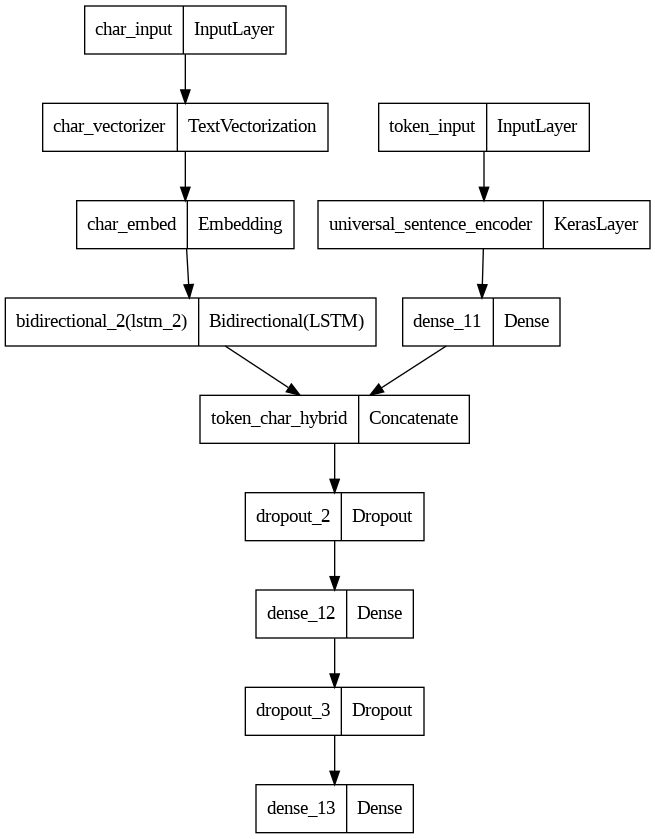

In [114]:
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [115]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD
                metrics=["accuracy"])

And again, to keep our experiments fast, we'll fit our token-character-hybrid model on 10% of training and validate on 10% of validation batches. However, the difference with this model is that it requires two inputs, token-level sequences and character-level sequences.

We can do this by create a `tf.data.Dataset` with a tuple as it's first input, for example:
* `((token_data, char_data), (label))`

Let's see it in action.

##### Combining token and character data into a `tf.data` dataset

In [118]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [119]:
# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [120]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [121]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 28s 39ms/step - loss: 1.4899 - accuracy: 0.3410 - val_loss: 1.4505 - val_accuracy: 0.4146
Epoch 2/3
562/562 [==============================] - 23s 41ms/step - loss: 1.4402 - accuracy: 0.3843 - val_loss: 1.4134 - val_accuracy: 0.4328
Epoch 3/3
562/562 [==============================] - 20s 35ms/step - loss: 1.4022 - accuracy: 0.4229 - val_loss: 1.3485 - val_accuracy: 0.4894


In [122]:
# Fit the model on tokens and chars
model_4_history_continued = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                                        initial_epoch = model_4_history.epoch[-1] + 1,
                              epochs=10,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 4/10
562/562 [==============================] - 23s 40ms/step - loss: 1.3337 - accuracy: 0.4653 - val_loss: 1.2453 - val_accuracy: 0.5163
Epoch 5/10
562/562 [==============================] - 19s 34ms/step - loss: 1.2352 - accuracy: 0.5023 - val_loss: 1.1290 - val_accuracy: 0.5525
Epoch 6/10
562/562 [==============================] - 20s 36ms/step - loss: 1.1537 - accuracy: 0.5372 - val_loss: 1.0381 - val_accuracy: 0.5944
Epoch 7/10
562/562 [==============================] - 19s 34ms/step - loss: 1.0783 - accuracy: 0.5643 - val_loss: 0.9768 - val_accuracy: 0.6100
Epoch 8/10
562/562 [==============================] - 21s 37ms/step - loss: 1.0443 - accuracy: 0.5766 - val_loss: 0.9419 - val_accuracy: 0.6230
Epoch 9/10
562/562 [==============================] - 21s 37ms/step - loss: 1.0181 - accuracy: 0.5881 - val_loss: 0.9153 - val_accuracy: 0.6283
Epoch 10/10
562/562 [==============================] - 21s 38ms/step - loss: 0.9877 - accuracy: 0.6021 - val_loss: 0.8962 - val_accuracy

In [124]:
# Fit the model on tokens and chars
model_4_history_continuued = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              initial_epoch = model_4_history_continued.epoch[-1] + 1,
                              epochs=20,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 11/20
562/562 [==============================] - 20s 36ms/step - loss: 0.9654 - accuracy: 0.6094 - val_loss: 0.8827 - val_accuracy: 0.6433
Epoch 12/20
562/562 [==============================] - 20s 35ms/step - loss: 0.9404 - accuracy: 0.6153 - val_loss: 0.8665 - val_accuracy: 0.6439
Epoch 13/20
562/562 [==============================] - 20s 36ms/step - loss: 0.9370 - accuracy: 0.6202 - val_loss: 0.8609 - val_accuracy: 0.6519
Epoch 14/20
562/562 [==============================] - 20s 36ms/step - loss: 0.9171 - accuracy: 0.6302 - val_loss: 0.8507 - val_accuracy: 0.6533
Epoch 15/20
562/562 [==============================] - 20s 36ms/step - loss: 0.9213 - accuracy: 0.6281 - val_loss: 0.8435 - val_accuracy: 0.6549
Epoch 16/20
562/562 [==============================] - 20s 36ms/step - loss: 0.9250 - accuracy: 0.6279 - val_loss: 0.8383 - val_accuracy: 0.6656
Epoch 17/20
562/562 [==============================] - 20s 36ms/step - loss: 0.9023 - accuracy: 0.6345 - val_loss: 0.8306 - val_ac

In [125]:
# Fit the model on tokens and chars
model_4_history_continuuued = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              initial_epoch = model_4_history_continuued.epoch[-1] + 1,
                              epochs=30,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 21/30
562/562 [==============================] - 21s 38ms/step - loss: 0.8788 - accuracy: 0.6562 - val_loss: 0.8110 - val_accuracy: 0.6835
Epoch 22/30
562/562 [==============================] - 20s 36ms/step - loss: 0.8618 - accuracy: 0.6568 - val_loss: 0.7974 - val_accuracy: 0.6915
Epoch 23/30
562/562 [==============================] - 19s 34ms/step - loss: 0.8650 - accuracy: 0.6586 - val_loss: 0.7945 - val_accuracy: 0.6958
Epoch 24/30
562/562 [==============================] - 21s 37ms/step - loss: 0.8490 - accuracy: 0.6671 - val_loss: 0.7884 - val_accuracy: 0.6928
Epoch 25/30
562/562 [==============================] - 20s 35ms/step - loss: 0.8648 - accuracy: 0.6620 - val_loss: 0.7853 - val_accuracy: 0.6935
Epoch 26/30
562/562 [==============================] - 20s 36ms/step - loss: 0.8666 - accuracy: 0.6606 - val_loss: 0.7819 - val_accuracy: 0.7018
Epoch 27/30
562/562 [==============================] - 19s 34ms/step - loss: 0.8424 - accuracy: 0.6724 - val_loss: 0.7738 - val_ac

In [126]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.7712 - accuracy: 0.7020


[0.7712312340736389, 0.7020058035850525]

In [127]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 20s 20ms/step


array([[4.0473157e-01, 4.5726475e-01, 1.1228176e-02, 1.0397051e-01,
        2.2804964e-02],
       [4.3350437e-01, 3.5687470e-01, 9.3331309e-03, 1.9174664e-01,
        8.5411882e-03],
       [3.0434865e-01, 2.3496503e-01, 3.4886993e-02, 3.8541797e-01,
        4.0381391e-02],
       ...,
       [7.2750647e-04, 7.9052942e-03, 3.0822273e-02, 5.0319283e-04,
        9.6004176e-01],
       [4.0332768e-03, 2.3078078e-02, 1.5720011e-01, 2.3391866e-03,
        8.1334937e-01],
       [1.7976187e-01, 2.2533351e-01, 3.7144631e-01, 2.3474135e-02,
        1.9998421e-01]], dtype=float32)

In [128]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 0, 3, ..., 4, 4, 2])>

In [129]:
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 70.20058254998014,
 'precision': 0.6963045580604853,
 'recall': 0.7020058254998014,
 'f1': 0.6973202935007238}

## **Model 5:** Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings